# Simple Linear Regression on Housing Prices

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("House Price Prediction Dataset.csv")

In [3]:
data.shape

(2000, 10)

In [4]:
data.head(3)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746


In [5]:
#Check if there are duplicates
data.drop_duplicates(inplace=True)

In [6]:
data.shape

(2000, 10)

In [7]:
data.drop(columns=['Id'], inplace=True)

In [8]:
data.head(3)

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746


In [9]:
#Check if there are missing values
data.isnull().sum()

Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [10]:
data.describe()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
sns.set_style('darkgrid')

<Axes: ylabel='Area'>

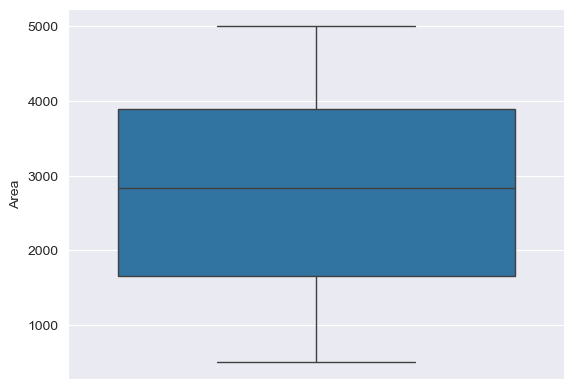

In [13]:
#Detecting outliers for an Area
sns.boxplot(data, y='Area')

In [14]:
import numpy as np
from scipy import stats

In [15]:
#Checking for outliers in the dataset

In [16]:
variables = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Location', 'Condition', 'Garage', 'Price']

In [17]:
# Separate numerical and categorical variables
numerical_vars = data[variables].select_dtypes(include=[np.number]).columns
categorical_vars = data[variables].select_dtypes(include=['object', 'category']).columns

In [18]:
# Outliers for numerical variables using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

In [19]:
# Detect and print outliers for numerical variables
print("Outliers in Numerical Variables (IQR Method):")
for var in numerical_vars:
    outliers = detect_outliers_iqr(data, var)
    print(f"{var} - Outliers: {len(outliers)}")
    if not outliers.empty:
        print(outliers[[var]])

Outliers in Numerical Variables (IQR Method):
Area - Outliers: 0
Bedrooms - Outliers: 0
Bathrooms - Outliers: 0
Floors - Outliers: 0
YearBuilt - Outliers: 0
Price - Outliers: 0


In [20]:
# Outliers for categorical variables as infrequent categories
def detect_outliers_categorical(data, column, threshold=0.05):
    value_counts = data[column].value_counts(normalize=True)
    rare_categories = value_counts[value_counts < threshold].index.tolist()
    outliers = data[data[column].isin(rare_categories)]
    return outliers

In [21]:
# Detect and print outliers for categorical variables
print("\nOutliers in Categorical Variables (Rare Categories):")
for var in categorical_vars:
    outliers = detect_outliers_categorical(data, var)
    print(f"{var} - Rare Categories: {outliers[var].unique()}")
    if not outliers.empty:
        print(outliers[[var]])


Outliers in Categorical Variables (Rare Categories):
Location - Rare Categories: []
Condition - Rare Categories: []
Garage - Rare Categories: []


In [22]:
#There are no outliers in the dataset

In [23]:
data

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1062,5,1,2,1903,Rural,Poor,No,476925
1998,4062,3,1,2,1936,Urban,Excellent,Yes,161119


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area       2000 non-null   int64 
 1   Bedrooms   2000 non-null   int64 
 2   Bathrooms  2000 non-null   int64 
 3   Floors     2000 non-null   int64 
 4   YearBuilt  2000 non-null   int64 
 5   Location   2000 non-null   object
 6   Condition  2000 non-null   object
 7   Garage     2000 non-null   object
 8   Price      2000 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 140.8+ KB


In [25]:
#The machine learning modelling cannot handle catecorical values, it can only handle numerical values.
#Convert categorical values into numerical values.

In [26]:
cat_col=data.select_dtypes('object').columns.tolist()

In [27]:
cat_col

['Location', 'Condition', 'Garage']

In [28]:
#Convert the above categorical values into numerical values

In [29]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder with sparse_output=False to get a dense array
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the data
encoder.fit_transform(data[cat_col])

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [30]:
encoded_cols = encoder.get_feature_names_out(cat_col)

In [31]:
encoded_cols

array(['Location_Downtown', 'Location_Rural', 'Location_Suburban',
       'Location_Urban', 'Condition_Excellent', 'Condition_Fair',
       'Condition_Good', 'Condition_Poor', 'Garage_No', 'Garage_Yes'],
      dtype=object)

In [32]:
data[encoded_cols] = encoder.transform(data[cat_col])

In [33]:
data

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,Location_Downtown,Location_Rural,Location_Suburban,Location_Urban,Condition_Excellent,Condition_Fair,Condition_Good,Condition_Poor,Garage_No,Garage_Yes
0,1360,5,4,3,1970,Downtown,Excellent,No,149919,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,4272,5,4,3,1958,Downtown,Excellent,No,424998,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3592,2,2,3,1938,Downtown,Good,No,266746,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,966,4,2,2,1902,Suburban,Fair,Yes,244020,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,Poor,No,295620,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1996,3046,5,2,1,2019,Suburban,Poor,Yes,580929,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1997,1062,5,1,2,1903,Rural,Poor,No,476925,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1998,4062,3,1,2,1936,Urban,Excellent,Yes,161119,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [34]:
data.drop(columns = cat_col, inplace=True)

In [35]:
data

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price,Location_Downtown,Location_Rural,Location_Suburban,Location_Urban,Condition_Excellent,Condition_Fair,Condition_Good,Condition_Poor,Garage_No,Garage_Yes
0,1360,5,4,3,1970,149919,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,4272,5,4,3,1958,424998,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3592,2,2,3,1938,266746,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,966,4,2,2,1902,244020,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4926,1,4,2,1975,636056,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,295620,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1996,3046,5,2,1,2019,580929,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1997,1062,5,1,2,1903,476925,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1998,4062,3,1,2,1936,161119,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [36]:
data.columns

Index(['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Price',
       'Location_Downtown', 'Location_Rural', 'Location_Suburban',
       'Location_Urban', 'Condition_Excellent', 'Condition_Fair',
       'Condition_Good', 'Condition_Poor', 'Garage_No', 'Garage_Yes'],
      dtype='object')

In [37]:
X=data.drop(columns= 'Price')
y= data['Price']

In [38]:
X

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location_Downtown,Location_Rural,Location_Suburban,Location_Urban,Condition_Excellent,Condition_Fair,Condition_Good,Condition_Poor,Garage_No,Garage_Yes
0,1360,5,4,3,1970,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,4272,5,4,3,1958,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3592,2,2,3,1938,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,966,4,2,2,1902,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4926,1,4,2,1975,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1996,3046,5,2,1,2019,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1997,1062,5,1,2,1903,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1998,4062,3,1,2,1936,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [39]:
#All columns are in different scales. Bring all columns into a single scale.
#This step is called standardising/normalising/preprocessing data.

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [41]:
X[:] = scaler.transform(X)

In [42]:
X

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location_Downtown,Location_Rural,Location_Suburban,Location_Urban,Condition_Excellent,Condition_Fair,Condition_Good,Condition_Poor,Garage_No,Garage_Yes
0,0.190974,1.00,1.000000,1.0,0.569106,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.838373,1.00,1.000000,1.0,0.471545,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.687194,0.25,0.333333,1.0,0.308943,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.103379,0.75,0.333333,0.5,0.016260,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.983771,0.00,1.000000,0.5,0.609756,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.998888,1.00,1.000000,1.0,0.186992,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1996,0.565807,1.00,0.333333,0.0,0.967480,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1997,0.124722,1.00,0.000000,0.5,0.024390,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1998,0.791685,0.50,0.000000,0.5,0.292683,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [43]:
#Dividing dataset into train dataset and test dataset

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 15), (400, 15), (1600,), (400,))

In [46]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred = model.predict(X_test)

In [48]:
y_test[:5]

1860    514764
353     694256
1333     66375
905     650243
1289    223285
Name: Price, dtype: int64

In [49]:
y_pred[:5]

array([536576., 567296., 502784., 536576., 550912.])

In [50]:
#Evaluate the model using the mean absolute error

In [51]:
from sklearn.metrics import mean_absolute_error

In [52]:
mean_absolute_error(y_test, y_pred)

243533.355

In [53]:
#To reduce mean absolute error using above methods

In [54]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 50, max_iter=100, tol = 0.1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [55]:
lasso_pred = lasso_model.predict(X_test)

In [56]:
mean_absolute_error(y_test, lasso_pred)

243212.8941700063

In [57]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha = 50, max_iter=100, tol = 0.1)
ridge_model.fit(X_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [58]:
ridge_pred = ridge_model.predict(X_test)

In [59]:
mean_absolute_error(y_test, ridge_pred)

242931.598714092

In [60]:
#Can conclude that the Ridge linear regression is doing much better than pure and lasso linear regression model.